In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [27]:
w=32

In [28]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [29]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1d59bfe7040
byteorder:  little
byteswap:  False
type: float64


In [30]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [31]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1d58474f040
byteorder:  little
byteswap:  False
type: float64


In [32]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [33]:
training_sample_labels

380244

In [34]:
training_sample

380244

In [35]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [36]:
train_X.shape

(380244, 32, 15)

In [37]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
#print(train_X)

In [39]:
train_y.shape

(380244,)

In [40]:
#print(test_y)

In [41]:
train_y=train_y.reshape(train_y.shape[0],1)

In [42]:
test_y=test_y.reshape(test_y.shape[0],1)

In [43]:
#print(train_X)

In [44]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [45]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=64),#,activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

#opt=keras.optimizers.SGD(learning_rate=0.9)
opt=keras.optimizers.Adam(learning_rate=0.0002)
model_gru.compile(loss='MSE', optimizer=opt,metrics=['accuracy'])

In [46]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 32, 256)           209664    
                                                                 
 gru_4 (GRU)                 (None, 32, 128)           148224    
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [47]:
 start = t.time()

In [48]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=16384)#, shuffle=False)

Epoch 1/140
24/24 [==============================] - 14s 356ms/step - loss: 0.2105 - accuracy: 0.7391 - val_loss: 0.1868 - val_accuracy: 0.7530
Epoch 2/140
24/24 [==============================] - 7s 297ms/step - loss: 0.1928 - accuracy: 0.7393 - val_loss: 0.1855 - val_accuracy: 0.7530
Epoch 3/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1896 - accuracy: 0.7393 - val_loss: 0.1810 - val_accuracy: 0.7530
Epoch 4/140
24/24 [==============================] - 7s 297ms/step - loss: 0.1822 - accuracy: 0.7387 - val_loss: 0.1731 - val_accuracy: 0.7519
Epoch 5/140
24/24 [==============================] - 7s 297ms/step - loss: 0.1752 - accuracy: 0.7399 - val_loss: 0.1668 - val_accuracy: 0.7504
Epoch 6/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1711 - accuracy: 0.7400 - val_loss: 0.1660 - val_accuracy: 0.7527
Epoch 7/140
24/24 [==============================] - 7s 298ms/step - loss: 0.1700 - accuracy: 0.7417 - val_loss: 0.1640 - val_accuracy: 0.753

Epoch 58/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1493 - accuracy: 0.7712 - val_loss: 0.1470 - val_accuracy: 0.7763
Epoch 59/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1490 - accuracy: 0.7716 - val_loss: 0.1478 - val_accuracy: 0.7755
Epoch 60/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1496 - accuracy: 0.7713 - val_loss: 0.1469 - val_accuracy: 0.7770
Epoch 61/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1492 - accuracy: 0.7716 - val_loss: 0.1478 - val_accuracy: 0.7758
Epoch 62/140
24/24 [==============================] - 7s 295ms/step - loss: 0.1490 - accuracy: 0.7719 - val_loss: 0.1473 - val_accuracy: 0.7766
Epoch 63/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1486 - accuracy: 0.7726 - val_loss: 0.1468 - val_accuracy: 0.7764
Epoch 64/140
24/24 [==============================] - 7s 296ms/step - loss: 0.1487 - accuracy: 0.7725 - val_loss: 0.1470 - val_accuracy:

Epoch 115/140
24/24 [==============================] - 7s 298ms/step - loss: 0.1449 - accuracy: 0.7794 - val_loss: 0.1449 - val_accuracy: 0.7782
Epoch 116/140
24/24 [==============================] - 7s 299ms/step - loss: 0.1447 - accuracy: 0.7800 - val_loss: 0.1452 - val_accuracy: 0.7812
Epoch 117/140
24/24 [==============================] - 7s 298ms/step - loss: 0.1450 - accuracy: 0.7793 - val_loss: 0.1472 - val_accuracy: 0.7806
Epoch 118/140
24/24 [==============================] - 7s 297ms/step - loss: 0.1453 - accuracy: 0.7796 - val_loss: 0.1446 - val_accuracy: 0.7812
Epoch 119/140
24/24 [==============================] - 7s 298ms/step - loss: 0.1448 - accuracy: 0.7797 - val_loss: 0.1459 - val_accuracy: 0.7812
Epoch 120/140
24/24 [==============================] - 7s 299ms/step - loss: 0.1450 - accuracy: 0.7795 - val_loss: 0.1440 - val_accuracy: 0.7808
Epoch 121/140
24/24 [==============================] - 7s 299ms/step - loss: 0.1444 - accuracy: 0.7801 - val_loss: 0.1445 - val_ac

In [49]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 25s 8ms/step


In [50]:
stop=t.time()-start
print(stop)

1033.1095316410065


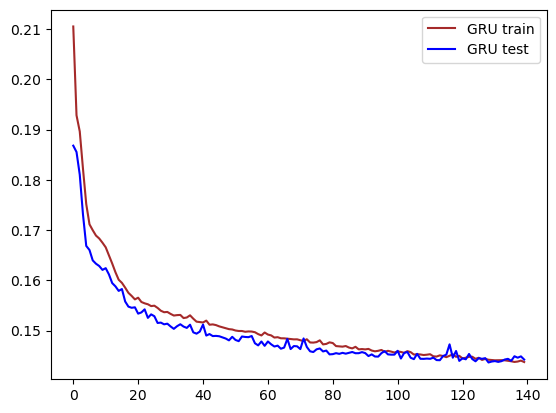

In [51]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

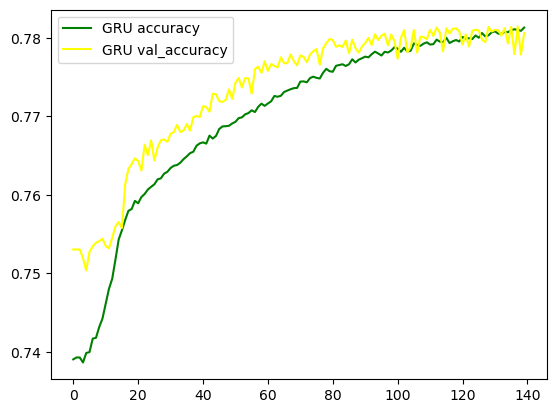

In [52]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [53]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [54]:
np.shape(pred_y)

(95061, 1)

In [55]:
pred_y

array([[0.00535608],
       [0.00773483],
       [0.00775007],
       ...,
       [0.06371966],
       [0.06408087],
       [0.06525251]], dtype=float32)

In [56]:
pred_y=np.reshape(pred_y,95061)

0.14421661932835772
0.224514042921637
0.379758632987267
0.2889955293317463


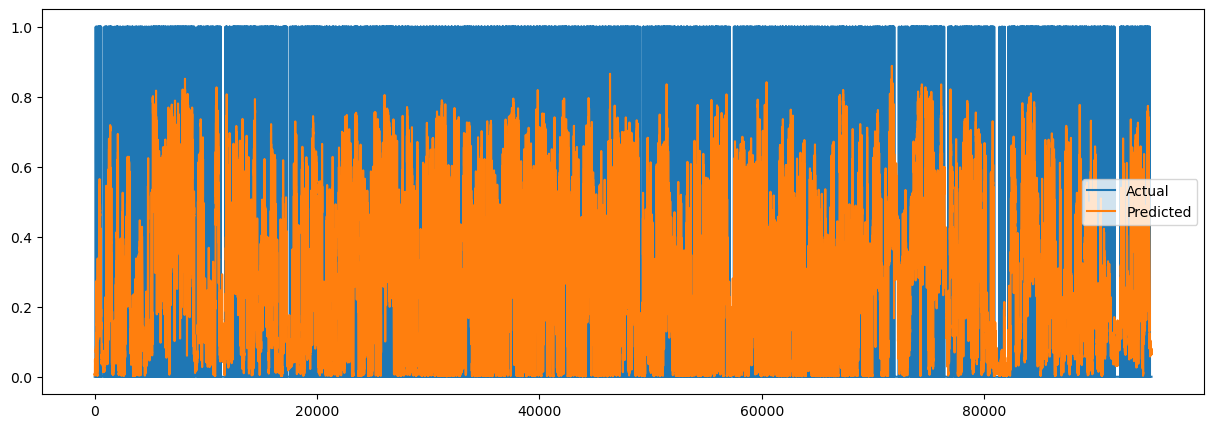

In [57]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [58]:
np.shape(train_X)

(380244, 32, 15)

In [59]:
np.shape(train_y)

(380244, 1)

In [60]:
np.shape(test_X)

(95061, 32, 15)

In [61]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 115s 8ms/step


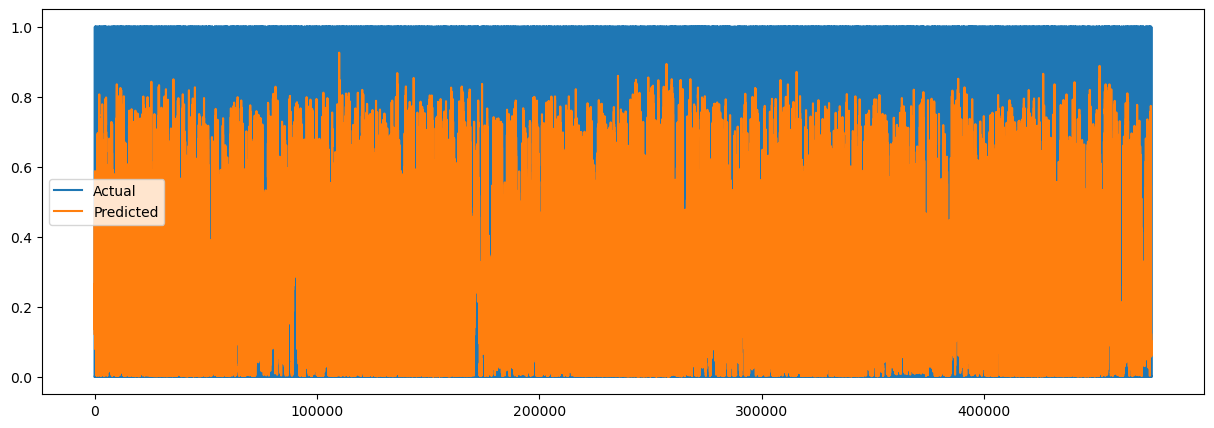

In [62]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

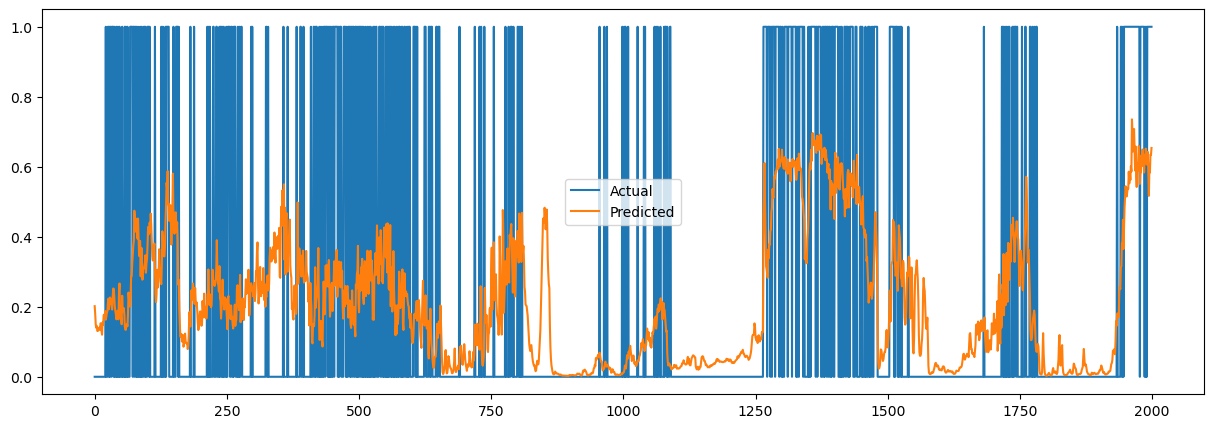

In [63]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [64]:
print(sum(tes)/len(tes))

[0.25795437]


In [65]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60738711]
[0.82098164]
total acc [0.78162233]


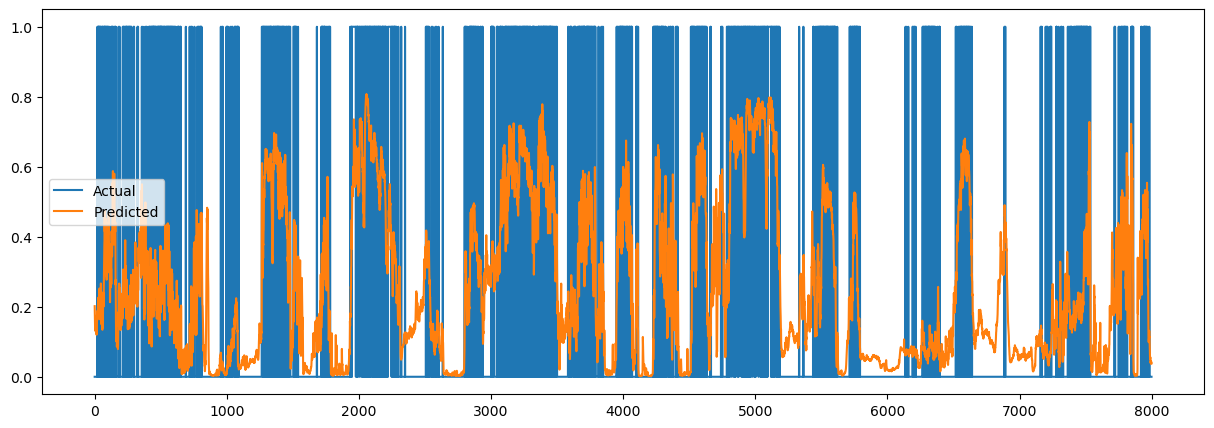

In [66]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

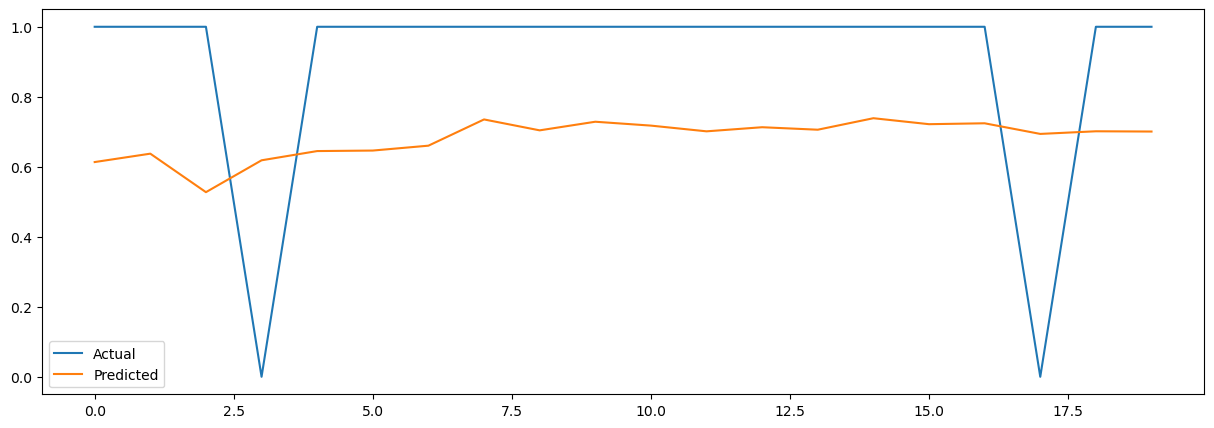

In [67]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

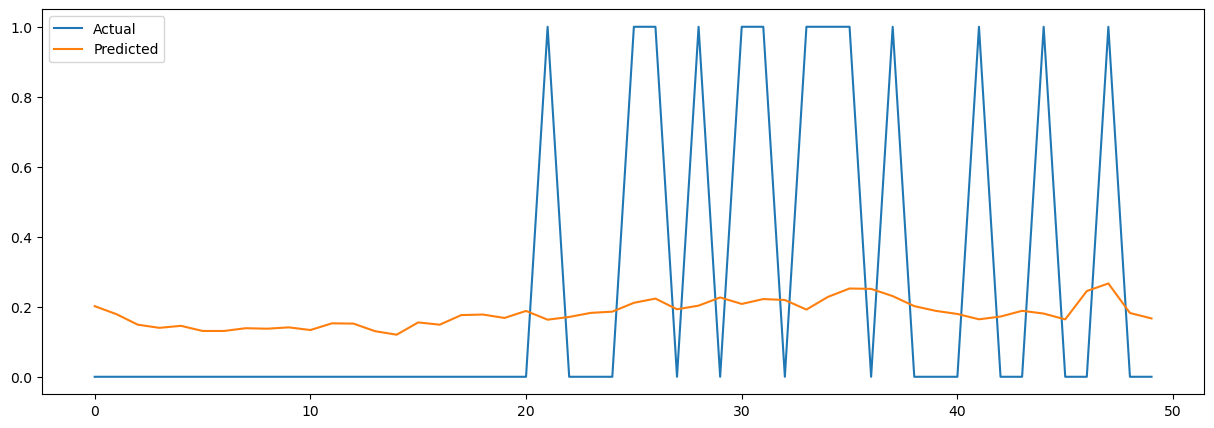

In [68]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

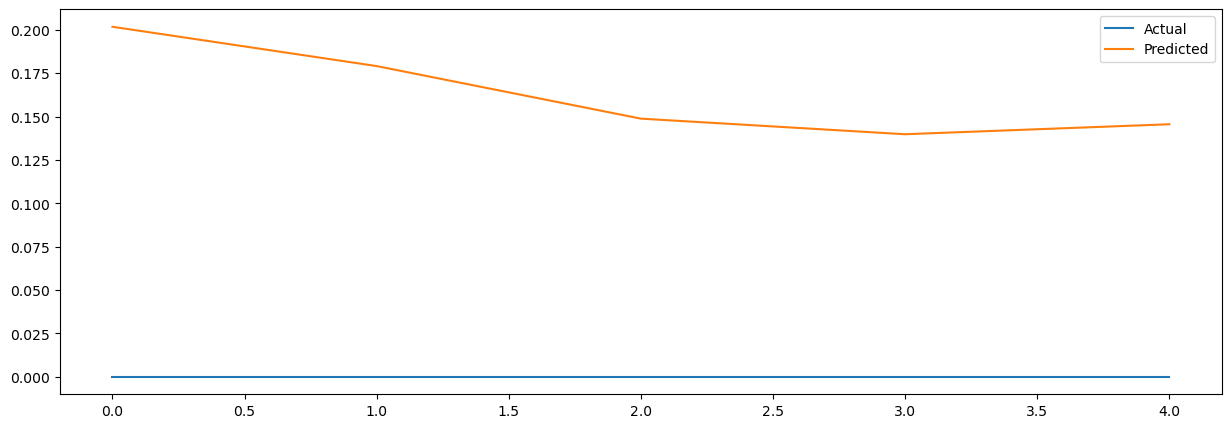

In [69]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [70]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 2015640576, 'peak': 9509394432}